<a href="https://colab.research.google.com/github/EmmanuelEjima/Assignment/blob/main/Supermarket_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Plot settings
plt.style.use('default')
sns.set_theme()


In [3]:
from google.colab import files

uploaded = files.upload()


Saving SuperMarket Analysis.csv to SuperMarket Analysis.csv


In [4]:
# Load dataset
df = pd.read_csv("SuperMarket Analysis.csv")

# Display first few rows
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Shape of dataset
df.shape


(1000, 17)

In [6]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# Statistical summary
df.describe()


,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
# Drop columns that do not help prediction
df = df.drop(columns=[
    "Invoice ID",
    "gross margin percentage"
])


In [9]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract useful features
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

# Convert Time to hour
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour

# Drop original Date and Time
df = df.drop(columns=["Date", "Time"])


/tmp/ipython-input-276060928.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"]).dt.hour


In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Encode categorical columns
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross income,Rating,Month,Day,Hour
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,26.1415,9.1,1,5,13
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,3.8200,9.6,3,8,10
2,0,2,1,0,4,46.33,7,16.2155,340.5255,1,324.31,16.2155,7.4,3,3,13
3,0,2,0,0,3,58.22,8,23.2880,489.0480,2,465.76,23.2880,8.4,1,27,20
4,0,2,0,0,5,86.31,7,30.2085,634.3785,2,604.17,30.2085,5.3,2,8,10


In [33]:
# Drop leakage columns directly from the dataframe
df = df.drop(columns=["Tax 5%", "cogs", "gross income"])

df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Sales,Payment,Rating,Month,Day,Hour
0,0,2,0,0,3,74.69,7,548.9715,2,9.1,1,5,13
1,2,1,1,0,0,15.28,5,80.2200,0,9.6,3,8,10
2,0,2,1,0,4,46.33,7,340.5255,1,7.4,3,3,13
3,0,2,0,0,3,58.22,8,489.0480,2,8.4,1,27,20
4,0,2,0,0,5,86.31,7,634.3785,2,5.3,2,8,10


In [35]:
# Features (X) and target (y)
X = df.drop("Sales", axis=1)
y = df["Sales"]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)


In [38]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)


In [39]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [40]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [41]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [
        evaluate_model(y_test, lr_preds)[0],
        evaluate_model(y_test, dt_preds)[0],
        evaluate_model(y_test, rf_preds)[0]
    ],
    "RMSE": [
        evaluate_model(y_test, lr_preds)[1],
        evaluate_model(y_test, dt_preds)[1],
        evaluate_model(y_test, rf_preds)[1]
    ],
    "R2 Score": [
        evaluate_model(y_test, lr_preds)[2],
        evaluate_model(y_test, dt_preds)[2],
        evaluate_model(y_test, rf_preds)[2]
    ]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,59.141309,79.598474,0.902613
1,Decision Tree,8.710958,13.944658,0.997011
2,Random Forest,7.017606,10.506949,0.998303


In [42]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
Quantity,0.518472
Unit price,0.478995
Day,0.000536
Rating,0.000515
Hour,0.000377
Product line,0.000255
Month,0.000197
City,0.000159
Payment,0.000158
Branch,0.000156


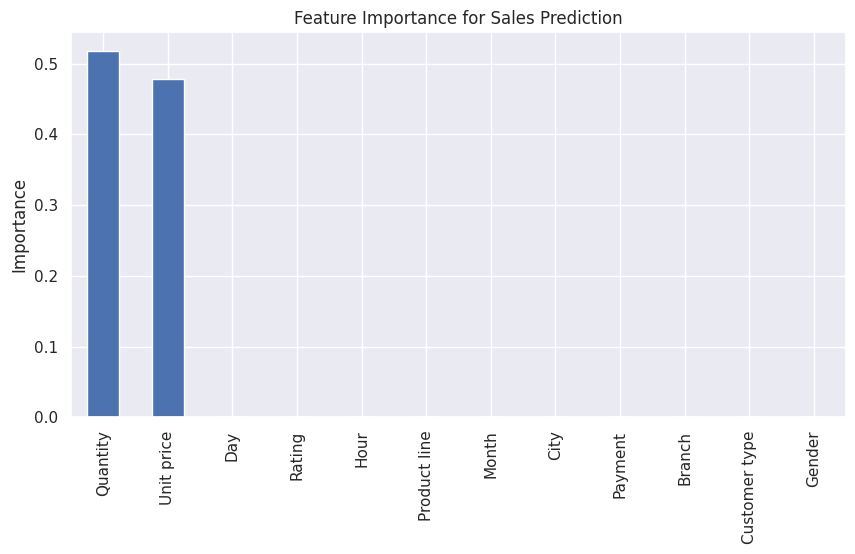

In [43]:
plt.figure(figsize=(10,5))
feature_importance.plot(kind='bar')
plt.title("Feature Importance for Sales Prediction")
plt.ylabel("Importance")
plt.show()
